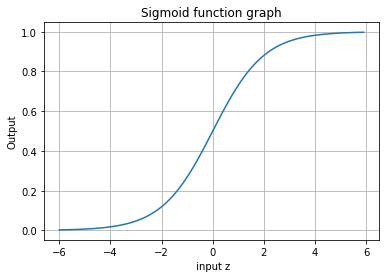

In [3]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-6, 6, 0.1)
sigmoid = 1/(1+np.exp(-z))
fig = plt.figure('Cost function convergence')
plt.plot(z,sigmoid)
plt.grid(True)
plt.xlabel(' input z')
plt.ylabel('Output')
plt.title('Sigmoid function graph')
plt.show()

In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [5]:
def sigmoid(X):
    '''sigmoid function '''
    return 1/(1+np.exp(-X))

In [6]:
def cost(theta, X, y):
    '''  logistic regression cost    '''
    sxt = sigmoid(np.dot(X, theta.T))
    mcost = (-y)*np.log(sxt) - (1-y)*np.log(1-sxt)
    return mcost.mean()

In [7]:
#def gradient(theta, X, y):
#    '''  logistic regression gradient    '''
#    sxt = sigmoid(np.dot(X, theta))
#    #label and prediction difference
#    err = sxt - y 
#    grad = np.dot(err, sxt) / y.size # gradient vector
#    return grad
#load the dataset

In [8]:
def predict(theta, X):
    #test new data
    m, n = X.shape
    p = np.zeros(shape=(m, 1))
    h = sigmoid(X.dot(theta.T))
    p = 1*(h>=0.5)
    return p 

In [9]:
puredata = np.loadtxt('iris.csv', delimiter=',')
#separate attributes x from class labels
X = puredata[:,0:2]
Y = puredata[:,2]
#print(X) only two feature is selected
#print(Y) label 

In [10]:
#append "1's" to attributes first column
XX = np.append( np.ones((X.shape[0], 1)), X, axis=1)
m , n = XX.shape
#print(XX)

In [11]:
theta = 0.1* np.random.randn(n)

In [12]:
#use fmin_bfgs optimisation function find thetas
theta = opt.fmin_bfgs(cost, theta, args=(XX, Y))

         Current function value: nan
         Iterations: 20
         Function evaluations: 665
         Gradient evaluations: 133


/home/avi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/avi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/avi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/avi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/avi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/avi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [13]:
theta

array([-2933.38402228,   741.91526574,  1235.97789784])

In [14]:
#test classifier with some random data
XXX = np.array([[1.0, 5.0, 1.4], #0
                [1.0, 1.4, 2.0], #0
                [1.0, 7.0, 1.0]]) #1

In [15]:
print(predict(theta, XXX))
#test on labeled data
p = predict(theta, XX)  
print("Predcted",p)
print ('Accuracy: %f' % ((Y[np.where(p == Y)].size / float(Y.size)) * 100.0))

[1 1 1]
Predcted [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 100.000000


https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

http://nbviewer.jupyter.org/github/tfolkman/learningwithdata/blob/master/Logistic%20Gradient%20Descent.ipynb